In [1]:
from google.colab import drive

drive.mount('/content/drive')

!unzip '/content/drive/MyDrive/insurance.zip'

Mounted at /content/drive
Archive:  /content/drive/MyDrive/insurance.zip
  inflating: insurance.csv           


In [2]:
!ls /content

drive  insurance.csv  sample_data


In [3]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
path='/content/insurance.csv'
dataframe=pd.read_csv(path)

In [5]:
#first 5 rows of dataframe
dataframe.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dataframe.shape

(1338, 7)

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#missing values
dataframe.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 700x500 with 0 Axes>

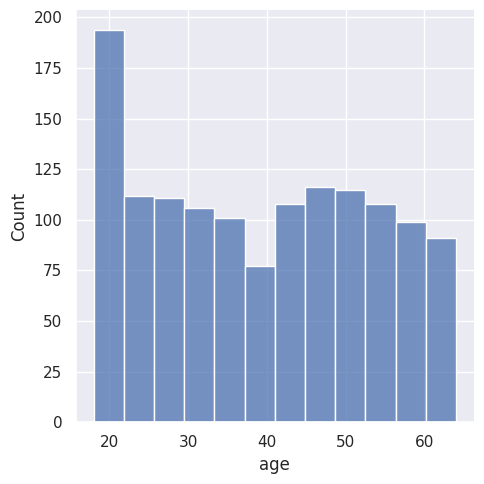

In [10]:
#age distribution
sns.set()
plt.figure(figsize=(7,5))
sns.displot(dataframe['age'])
plt.show()

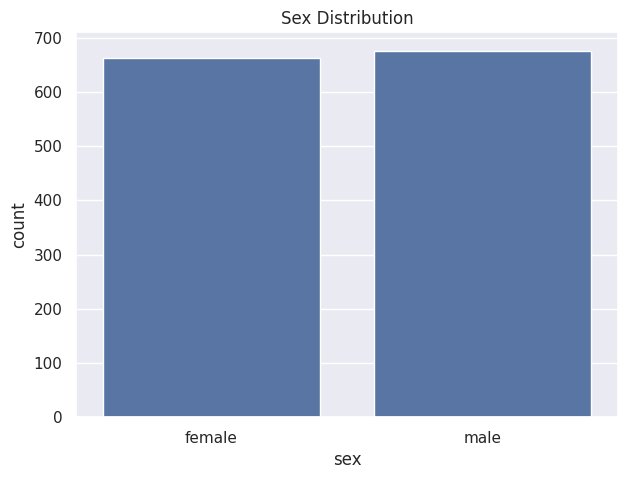

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(x='sex',data=dataframe)
plt.title('Sex Distribution')
plt.show()

In [12]:
dataframe['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-13-5158089d3b51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['bmi'])


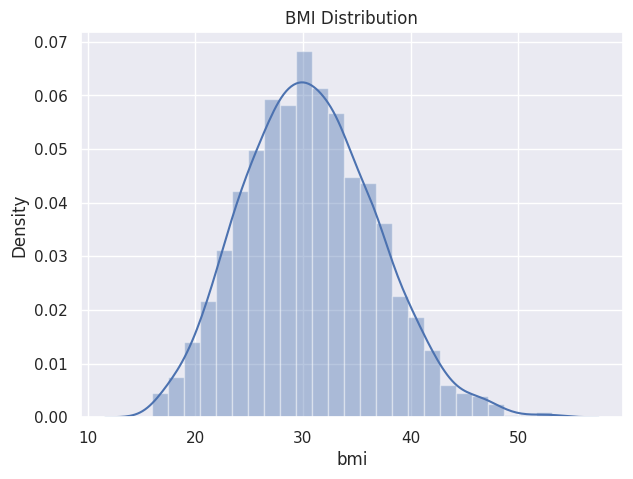

In [13]:
#bmi distribution
plt.figure(figsize=(7,5))
sns.distplot(dataframe['bmi'])
plt.title('BMI Distribution')
plt.show()

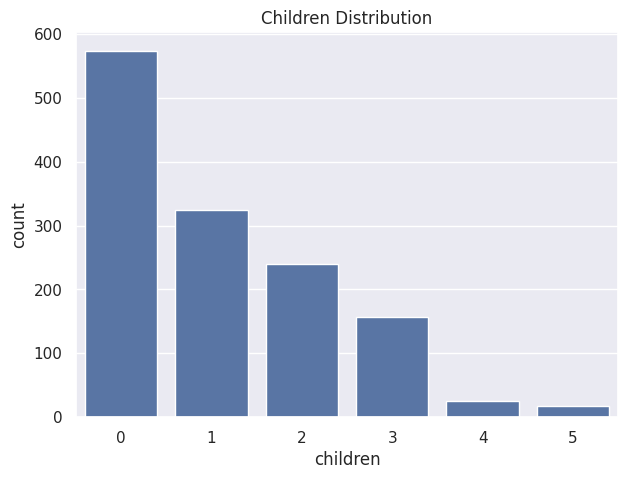

In [14]:
#child distribution plot
plt.figure(figsize=(7,5))
sns.countplot(x='children',data=dataframe)
plt.title('Children Distribution')
plt.show()

In [15]:
dataframe['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


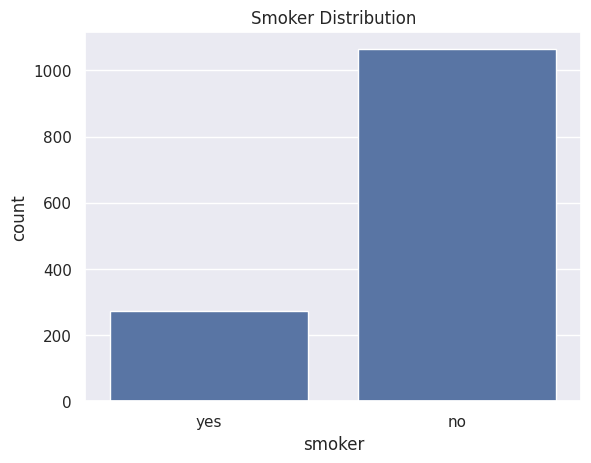

In [16]:
#smoker distribution
plt.figsize=(7,5)
sns.countplot(x='smoker',data=dataframe)
plt.title('Smoker Distribution')
plt.show()

In [17]:
dataframe['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


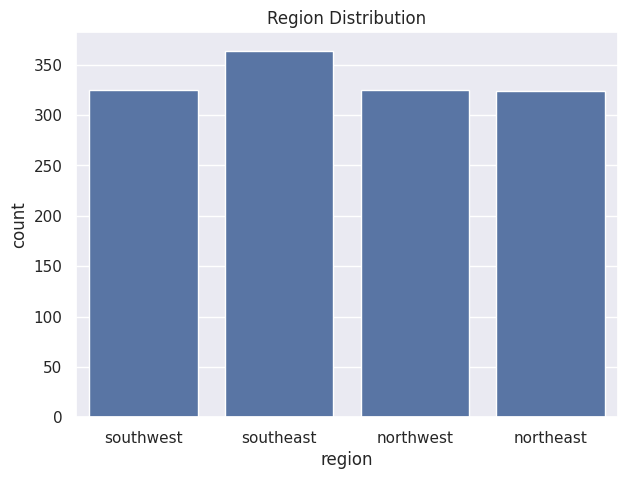

In [18]:
#region distribution
plt.figure(figsize=(7,5))
sns.countplot(x='region',data=dataframe)
plt.title('Region Distribution')
plt.show()

In [19]:
dataframe['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<Figure size 700x500 with 0 Axes>

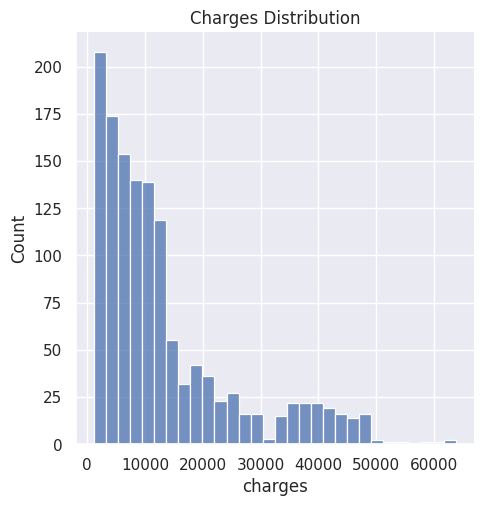

In [20]:
#charges distribution
plt.figure(figsize=(7,5))
sns.displot(dataframe['charges'])
plt.title('Charges Distribution')
plt.show()

In [21]:
dataframe['charges'].value_counts()

,count
charges,
1639.56310,2
16884.92400,1
29330.98315,1
2221.56445,1
19798.05455,1
...,...
7345.08400,1
26109.32905,1
28287.89766,1


Data Pre-processing

Converting Categorical Features to Numerical

In [22]:
#encoding the categorial features

dataframe.replace({'sex':{'male':0,'female':1}},inplace=True)
dataframe.replace({'smoker':{'no':0,'yes':1}},inplace=True)
dataframe.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

<ipython-input-22-33811b1b6a23>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace({'sex':{'male':0,'female':1}},inplace=True)
<ipython-input-22-33811b1b6a23>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe.replace({'smoker':{'no':0,'yes':1}},inplace=True)
<ipython-input-22-33811b1b6a23>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior,

In [23]:
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [24]:
X=dataframe.drop(columns='charges',axis=1)
Y=dataframe['charges']

In [25]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [26]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [27]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Splitting the data into Training data & Testing data

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training


Linear Regression


In [30]:
model = LinearRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)


In [31]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Evaluation


In [32]:

# R-Squared values
r_squared_train = metrics.r2_score(Y_train, X_train_prediction)
r_squared_test = metrics.r2_score(Y_test, X_test_prediction)
print('R-Squared Value (Train):', r_squared_train)
print('R-Squared Value (Test):', r_squared_test)

R-Squared Value (Train): 0.751505643411174
R-Squared Value (Test): 0.7447273869684076


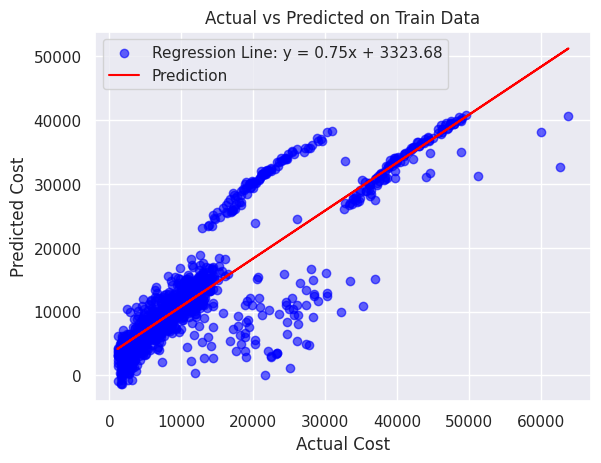

In [33]:

m_train, b_train = np.polyfit(Y_train, X_train_prediction, 1)
plt.scatter(Y_train, X_train_prediction, alpha=0.6, color='blue')
plt.plot(Y_train, m_train * Y_train + b_train, color='red')
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Predicted on Train Data")
plt.legend([f'Regression Line: y = {m_train:.2f}x + {b_train:.2f}', "Prediction"])
plt.show()

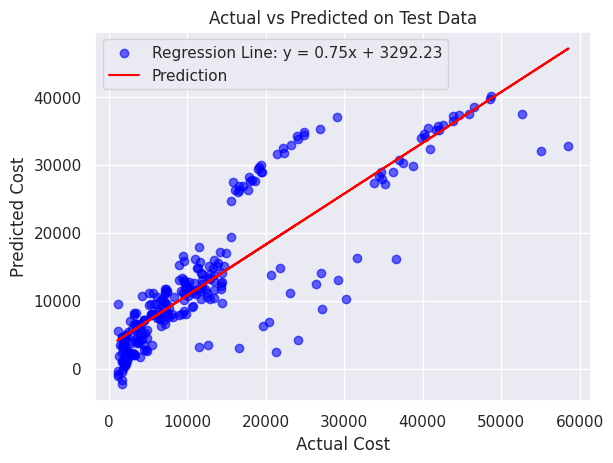

In [34]:
# Plot Actual vs Predicted for testing data
m_test, b_test = np.polyfit(Y_test, X_test_prediction, 1)
plt.scatter(Y_test, X_test_prediction, alpha=0.6, color='blue')
plt.plot(Y_test, m_test * Y_test + b_test, color='red')
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Actual vs Predicted on Test Data")
plt.legend([f'Regression Line: y = {m_test:.2f}x + {b_test:.2f}', "Prediction"])
plt.show()

In [35]:
mae_train = metrics.mean_absolute_error(Y_train, X_train_prediction)
mae_test = metrics.mean_absolute_error(Y_test,X_test_prediction)
rmse_train = np.sqrt(metrics.mean_squared_error(Y_train,X_train_prediction))
rmse_test = np.sqrt(metrics.mean_squared_error(Y_test,X_test_prediction))

In [36]:
print('Mean Absolute Error (Train) =', mae_train)
print('Mean Absolute Error (Test) =', mae_test)
print('Root Mean Squared Error (Train) =', rmse_train)
print('Root Mean Squared Error (Test) =', rmse_test)

Mean Absolute Error (Train) = 4150.500304883776
Mean Absolute Error (Test) = 4267.213826730733
Root Mean Squared Error (Train) = 6014.563860089282
Root Mean Squared Error (Test) = 6191.690842285236


In [37]:
# Fit Ridge Regression with Cross-Validation
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}  # Hyperparameter Tuning
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_absolute_error')
ridge_cv.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_absolute_error')

In [38]:
# Best Ridge Model
best_ridge = ridge_cv.best_estimator_
print("Best Ridge Alpha:", ridge_cv.best_params_['alpha'])

Best Ridge Alpha: 0.1


In [39]:
# Predictions for Ridge
X_train_prediction_ridge = best_ridge.predict(X_train_scaled)
X_test_prediction_ridge = best_ridge.predict(X_test_scaled)

In [40]:
# R-Squared Values (Ridge)
r_squared_train_ridge = metrics.r2_score(Y_train, X_train_prediction_ridge)
r_squared_test_ridge = metrics.r2_score(Y_test, X_test_prediction_ridge)
print('R-Squared Value (Train - Ridge):', r_squared_train_ridge)
print('R-Squared Value (Test - Ridge):', r_squared_test_ridge)


R-Squared Value (Train - Ridge): 0.7515056366402955
R-Squared Value (Test - Ridge): 0.744727042703778


In [41]:
# Error Metrics (Ridge)
mae_train_ridge = metrics.mean_absolute_error(Y_train, X_train_prediction_ridge)
mae_test_ridge = metrics.mean_absolute_error(Y_test, X_test_prediction_ridge)
rmse_train_ridge = np.sqrt(metrics.mean_squared_error(Y_train, X_train_prediction_ridge))
rmse_test_ridge = np.sqrt(metrics.mean_squared_error(Y_test, X_test_prediction_ridge))

In [42]:
print('Mean Absolute Error (Train - Ridge):', mae_train_ridge)
print('Mean Absolute Error (Test - Ridge):', mae_test_ridge)
print('Root Mean Squared Error (Train - Ridge):', rmse_train_ridge)
print('Root Mean Squared Error (Test - Ridge):', rmse_test_ridge)

Mean Absolute Error (Train - Ridge): 4150.646863400152
Mean Absolute Error (Test - Ridge): 4267.263335230557
Root Mean Squared Error (Train - Ridge): 6014.563942030541
Root Mean Squared Error (Test - Ridge): 6191.695017389275


In [43]:

scores = cross_val_score(model, X_scaled, Y, cv=5, scoring='neg_mean_absolute_error')
print("Cross-validated MAE:", -scores.mean())

Cross-validated MAE: 4200.411169611098


In [44]:
Y_test_list = list(Y_test)

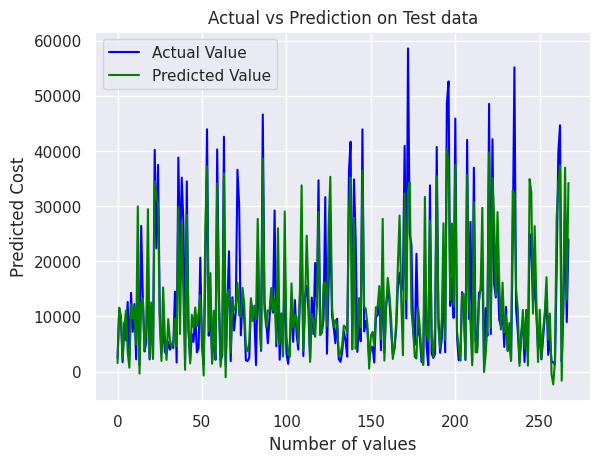

In [45]:
# Visualization
plt.plot(Y_test_list, color = "blue", label = "Actual Value")
plt.plot(X_test_prediction, color = "green", label = "Predicted Value")
plt.title("Actual vs Prediction on Test data")
plt.xlabel("Number of values")
plt.ylabel("Predicted Cost")
plt.legend()
plt.show()

In [46]:
def predict_charges(input_data):
    # Ensure input data has the correct shape
    input_data = np.array(input_data).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)  # Scale using the same scaler
    prediction = best_ridge.predict(input_data_scaled)
    return prediction


In [47]:
# Example usage of the predictive system

columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Ensure the input is in a DataFrame with the correct column names
example_input = pd.DataFrame([[35, 0, 28.5, 2, 0, 0]], columns=columns)
example_input_scaled = scaler.transform(example_input)

example_prediction = best_ridge.predict(example_input_scaled)
print('Predicted Insurance Charges:', example_prediction[0])


Predicted Insurance Charges: 6813.550534375028
